***
***
***

<br><h2>Assignment 2:</h2> 
<h1>Case Analysis for "APPRENTIC CHEF INC"</h1><br>
MSBA 5 | Machine Learning<br>
Professor: Chase Kusterer<br>
Hult International Business School<br>

Student: <strong>Sunlong Ngouv</strong><br>
Date: March 15th, 2020<br><br><br>

***

<strong> Domain Knowledge: </strong><br>
"Cross Sale Success" is one of the common KPIs in marketing strategy for business to improve revenue. According to [INSTAPAGE (2020)](https://instapage.com/blog/cross-selling), it can be achieved through several matrices, including: 
1. Offering additional service
2. Provide complementary items (bundle sales)
3. Make data-driven suggestions
4. Pitch promotions
5. Educate your clients

In the case of "APPRENTIC CHEF INC", the company has been trying to achieve the Cross_Sale_Success by offering bundle sales of their foods with three choices of the drinks: still water, sparkling water and wine. Recently, the company has been including 'Halfway There' promotion with half bottle of California win, available for subscribers every Wednesday to Friday, in its drink menu and is looking forward for the outcome of this promotion.


Following is an analysis of the Cross_Sale_Success with 'Halfway there' in Python code with objectives:
1. To evaluate level of success of the promotion currently
2. To predict likelihood of the success in the future

***
***

## EXPLORATION DATA ANALYSIS

### Importing and imputing Data

In [88]:
# Importing Packages
import numpy as np              # convert to array
import pandas as pd             # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns           # enhanced graphical output
import sys                      # coopeated with Pandas library for print()
sys._stdout_ = sys.stdout
import statsmodels.formula.api as smf                # OLS library
import random            as rand                     # random number gen
import pandas            as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler

# libraries for classification trees
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from sklearn.externals.six import StringIO           # saves objects in memory
from IPython.display import Image                    # displays on frontend
import pydotplus                                     # interprets dot objects
from sklearn.model_selection import GridSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer

# new packages
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm

# import data set from excel
file = "Apprentice_Chef_Dataset.xlsx"
df = pd.read_excel(file)
df.columns

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME',
       'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH',
       'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED',
       'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON',
       'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS',
       'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES',
       'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'FOLLOWED_RECOMMENDATIONS_PCT',
       'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED',
       'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED'],
      dtype='object')

In [89]:
# call out data dictionary 
App_description = pd.read_excel("Apprentice_Chef_Data_Dictionary.xlsx")

App_description

,Column,Data Type,Description,Unnamed: 3
0,REVENUE,float,Total revenue generated over the first year of...,Find revenue per customer by TT sales/TT custo...
1,CROSS_SELL_SUCCESS,integer,Success of promoting Halfway There (1 = SUCCES...,NaN
2,NAME,string,Full name of customer (collected upon initial ...,NaN
3,EMAIL,string,Email of customer (collected upon initial regi...,NaN
4,FIRST_NAME,string,First name of customer (collected upon initial...,NaN
5,FAMILY_NAME,string,Last name of customer (collected upon initial ...,NaN
6,TOTAL_MEALS_ORDERED,integer,Total count of meals ordered per customer account,NaN
7,UNIQUE_MEALS_PURCH,integer,Count of unique meal sets ordered per customer...,NaN
8,CONTACTS_W_CUSTOMER_SERVICE,integer,Count of times a customer made contact with cu...,NaN
9,PRODUCT_CATEGORIES_VIEWED,integer,Total number of meal categories viewed (online...,NaN


In [90]:
#############################################################################
# DATA EXPLORATION AND FILL_NA
#############################################################################

# check null in data frame
df_null = df.isnull().sum()
df_null[df_null>0]

FAMILY_NAME    47
dtype: int64

#### FINDING:

There were 47 customers not giving their family's name when registration their accounts.

In [91]:
# fill NA to the collumn "FAMILY_NAME" and check for existing Null
for col in df:
    
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna("NA")

print (f"""
Check for existing null in column "FAMILY_NAME" 
--------------------
{df["FAMILY_NAME"].isnull().sum()}


Check for existing null in "Original DataFrame"
--------------------
{df.isnull().any().sum()}""")


Check for existing null in column "FAMILY_NAME" 
--------------------
0


Check for existing null in "Original DataFrame"
--------------------
0


#### FINDING
1. Missing value has been filled.
2. There is no missing value any more.

### Categorical Data Analysis

In [92]:
# convert categorical variables to string
cate_df = df[['NAME', 'EMAIL', 'FIRST_NAME','FAMILY_NAME']].astype(str)

In [93]:
# count subcategory in each variable
name = cate_df['NAME'].value_counts()
email = cate_df['EMAIL'].value_counts()
first_name = cate_df['FIRST_NAME'].value_counts()
family_name = cate_df['FAMILY_NAME'].value_counts()

In [94]:
# count subcategory in each variable
print(f"""
>>> Numbers of the customers having full names: 
{cate_df['NAME'].value_counts()}

>>> Numbers of the customers having emails: 
{cate_df['EMAIL'].value_counts()}

>>> Numbers of the customers having only first names: 
{cate_df['FIRST_NAME'].value_counts()}

>>> Numbers of the customers having only lat names: 
{cate_df['FAMILY_NAME'].value_counts()}""")


>>> Numbers of the customers having full names: 
Torwynd                  1
Elbert Arryn             1
Perriane Frey            1
Norjen                   1
Ravella Swann            1
                        ..
Rodrik Cassel            1
Lorent Tyrell            1
Jaehaerys I Targaryen    1
Dagon Greyjoy            1
Stiv                     1
Name: NAME, Length: 1946, dtype: int64

>>> Numbers of the customers having emails: 
perriane.frey@boeing.com                  1
rylene.florent@unitedtech.com             1
rafford@msn.com                           1
kyleg@pg.com                              1
robert.brax.(son.of.flement)@apple.com    1
                                         ..
cayn@yahoo.com                            1
joss@yahoo.com                            1
triston.farwynd@cocacola.com              1
owen.norrey@yahoo.com                     1
osmund.kettleblack@gmail.com              1
Name: EMAIL, Length: 1946, dtype: int64

>>> Numbers of the customers having only fi

## FEATURE TREATMENT AND ENGINEERING

In [95]:
#############################################################################
############ CREATING NEW VARIABLES
#############################################################################

# create new DateFrame by copying from 'df'
df_dumm = df.copy()

In [96]:
# split all email column

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in df_dumm.iterrows():
    
    # splitting email domain at '@'
    split_email = df_dumm.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# displaying the results
#email_df

In [97]:
# concatenate with original DataFrame

# renaming column to concatenate
email_df.columns = ['0' , 'email_domain']


# concatenating personal_email_domain with chef DataFrame
df_dumm = pd.concat([df_dumm, email_df['email_domain']],
                     axis = 1)

In [98]:
# email domain types
personal_email  = ['@gmail.com', '@yahoo.com', '@protonmail.com']
junk_email      = ['@me.com', '@aol.com', '@hotmail.com',
                       '@live.com', '@msn.com', '@passport.com']
prof_email      = ['@mmm.com', '@amex.com', '@apple.com',
                       '@boeing.com', '@caterpillar.com', '@chevron.com',
                       '@cisco.com', '@cocacola.com', '@disney.com', 
                       '@dupont.com', '@exxon.com', '@ge.org', 
                       '@goldmansacs.com', '@homedepot.com', '@ibm.com', 
                       '@intel.com', '@jnj.com', '@jpmorgan.com', 
                       '@mcdonalds.com', '@merck.com', '@microsoft.com', 
                       '@nike.com', '@pfizer.com', '@pg.com', 
                       '@travelers.com', '@unitedtech.com', '@unitedhealth.com',
                       '@verizon.com', '@visa.com', '@walmart.com']


# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in df_dumm['email_domain']:
    
    if '@' + str(domain) in personal_email:
        placeholder_lst.append('personal')
        

    elif '@' + str(domain) in junk_email:
        placeholder_lst.append('junk')
        
        
    elif '@' + str(domain) in prof_email:
        placeholder_lst.append('professional')


    else:
        print('Unknown')


# concatenating with original DataFrame
df_dumm['domain_group'] = pd.Series(placeholder_lst)


# checking results
df_dumm['domain_group'].value_counts()

personal        861
professional    696
junk            389
Name: domain_group, dtype: int64

In [99]:
# create new columns: "TT_purchase_person" and 'ticket_price'
df_dumm['TT_purchase_person'] = (df_dumm['TOTAL_MEALS_ORDERED']/df_dumm['UNIQUE_MEALS_PURCH']).round(2)
df_dumm['ticket_price'] = (df_dumm['REVENUE']/df_dumm['TOTAL_MEALS_ORDERED']).round(2)

In [100]:
# total revenue per customer in average
total_rev_person = (sum(df_dumm['REVENUE'])/len(df_dumm['NAME']))

In [101]:
# get dummies for domain group
dummies = pd.get_dummies(df_dumm['domain_group'])

# concatenating personal_email_domain with Original DataFrame
df_dumm = pd.concat([df_dumm, dummies],
                     axis = 1)

# converting the dummies to int64
df_dumm['junk'] = np.int64(df_dumm['junk'])
df_dumm['personal'] = np.int64(df_dumm['personal'])
df_dumm['professional'] = np.int64(df_dumm['professional'])

In [102]:
# lsit down the four popular family-name customers
top_fam_name = ['Frey','Stark','Lannister','Tyrell ']

for col in df_dumm:
    if col in top_fam_name:
       df_dumm[col]

df_dumm['top_fam_name'] = df_dumm[col]
#df_dumm['top_fam_name']

In [103]:
# one-hot approach to encode categorical variables
one_hot_fam_name      = pd.get_dummies(df_dumm['top_fam_name'])

# joining codings together
df_dumm = df_dumm.join([one_hot_fam_name])

# saving new columns
new_columns = df_dumm.columns
#new_columns

In [104]:
# analyzing the three revenue groups: below 2000, between 2001 to 5000, and above 5000.
# create new column named "expense_group"
df_dumm['expense_group'] = df_dumm['REVENUE']

lst = []

for i in df_dumm.index: 
    if df_dumm['REVENUE'][i]<2000:
        lst.append('LOW')
    elif df_dumm['REVENUE'][i]>2000 and df_dumm['REVENUE'][i]<5000:
        lst.append('MID')
    else:
        lst.append('HIGH')
        
lst.count
df_dumm['expense_group'] = lst
#df_dumm['expense_group']

In [105]:
# one-hot approach to encode categorical variables
one_hot_expense_group      = pd.get_dummies(df_dumm['expense_group'])

# joining codings together
df_dumm = df_dumm.join([one_hot_expense_group])

## Numerical Data

In [106]:
# Create new DataFrame by dropping four categorical variables
num_df = df_dumm.drop(['NAME', 'EMAIL', 'FIRST_NAME','FAMILY_NAME', 'email_domain','domain_group','expense_group'], axis=1)

In [107]:
"""
########################
# Visual EDA (Histograms)
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(num_df['TOTAL_PHOTOS_VIEWED'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('TOTAL_PHOTOS_VIEWED')

########################

plt.subplot(2, 2, 2)
sns.distplot(num_df['TOTAL_MEALS_ORDERED'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('TOTAL_MEALS_ORDERED')

########################

plt.subplot(2, 2, 3)
sns.distplot(num_df['UNIQUE_MEALS_PURCH'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('UNIQUE_MEALS_PURCH')

########################
plt.subplot(2, 2, 4)
sns.distplot(num_df['CONTACTS_W_CUSTOMER_SERVICE'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')

########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(num_df['PRODUCT_CATEGORIES_VIEWED'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('PRODUCT_CATEGORIES_VIEWED')

########################

plt.subplot(2, 2, 2)
sns.distplot(num_df['AVG_TIME_PER_SITE_VISIT'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('AVG_TIME_PER_SITE_VISIT')

########################

plt.subplot(2, 2, 3)
sns.distplot(num_df['CANCELLATIONS_BEFORE_NOON'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('CANCELLATIONS_BEFORE_NOON')

########################
plt.subplot(2, 2, 4)
sns.distplot(num_df['CANCELLATIONS_AFTER_NOON'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('CANCELLATIONS_AFTER_NOON')

########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(num_df['WEEKLY_PLAN'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('WEEKLY_PLAN')

########################

plt.subplot(2, 2, 2)
sns.distplot(num_df['EARLY_DELIVERIES'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('EARLY_DELIVERIES')

########################

plt.subplot(2, 2, 3)
sns.distplot(num_df['LATE_DELIVERIES'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('LATE_DELIVERIES')

########################
plt.subplot(2, 2, 4)
sns.distplot(num_df['PACKAGE_LOCKER'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('PACKAGE_LOCKER')

########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(num_df['AVG_CLICKS_PER_VISIT'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('AVG_CLICKS_PER_VISIT')

########################

plt.subplot(2, 2, 2)
sns.distplot(num_df['FOLLOWED_RECOMMENDATIONS_PCT'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT')

########################

plt.subplot(2, 2, 3)
sns.distplot(num_df['AVG_PREP_VID_TIME'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('AVG_PREP_VID_TIME')

########################
plt.subplot(2, 2, 4)
sns.distplot(num_df['LARGEST_ORDER_SIZE'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('LARGEST_ORDER_SIZE')


########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(num_df['top_fam_name'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('top_fam_name')

########################

plt.subplot(2, 2, 2)
sns.distplot(num_df['professional'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('Professional_Email')

########################

plt.subplot(2, 2, 3)
sns.distplot(num_df['personal'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('Personal_Email')

########################
plt.subplot(2, 2, 4)
sns.distplot(num_df['junk'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('Junk_Email')

########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(num_df['TT_purchase_person'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('TT_purchase_person')

########################

plt.subplot(2, 2, 2)
sns.distplot(num_df['ticket_price'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('ticket_price')
########################

plt.subplot(2, 2, 3)
sns.distplot(num_df['MOBILE_LOGINS'],
             bins  = 'fd',
             color = 'orange')
plt.xlabel('MOBILE_LOGINS')
########################

plt.subplot(2, 2, 4)
sns.distplot(num_df['PC_LOGINS'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('PC_LOGINS')
########################

plt.tight_layout()
#plt.savefig('Housing Data Histograms 1 of 5.png')
plt.show()

"""

"\n########################\n# Visual EDA (Histograms)\n########################\n\nfig, ax = plt.subplots(figsize = (10, 8))\nplt.subplot(2, 2, 1)\nsns.distplot(num_df['TOTAL_PHOTOS_VIEWED'],\n             bins  = 'fd',\n             color = 'g')\nplt.xlabel('TOTAL_PHOTOS_VIEWED')\n\n########################\n\nplt.subplot(2, 2, 2)\nsns.distplot(num_df['TOTAL_MEALS_ORDERED'],\n             bins  = 'fd',\n             color = 'y')\nplt.xlabel('TOTAL_MEALS_ORDERED')\n\n########################\n\nplt.subplot(2, 2, 3)\nsns.distplot(num_df['UNIQUE_MEALS_PURCH'],\n             bins  = 'fd',\n             kde   = False,\n             rug   = True,\n             color = 'orange')\nplt.xlabel('UNIQUE_MEALS_PURCH')\n\n########################\nplt.subplot(2, 2, 4)\nsns.distplot(num_df['CONTACTS_W_CUSTOMER_SERVICE'],\n             bins  = 'fd',\n             kde   = False,\n             rug   = True,\n             color = 'r')\nplt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')\n\n######################

In [108]:
"""
# Visual EDA (Scatterplots)
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = num_df['REVENUE'],
                y = num_df['CROSS_SELL_SUCCESS'],
                color = 'g')
plt.xlabel('REVENUE')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = num_df['TOTAL_MEALS_ORDERED'],
                y = num_df['CROSS_SELL_SUCCESS'],
                color = 'y')
plt.xlabel('TOTAL_MEALS_ORDERED')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = num_df['UNIQUE_MEALS_PURCH'],
                y = num_df['CROSS_SELL_SUCCESS'],
                color = 'orange')
plt.xlabel('UNIQUE_MEALS_PURCH')

########################
plt.subplot(2, 2, 4)
sns.scatterplot(x = num_df['CONTACTS_W_CUSTOMER_SERVICE'],
                y = num_df['CROSS_SELL_SUCCESS'],
                color = 'r')
plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = num_df['PRODUCT_CATEGORIES_VIEWED'],
                y = num_df['CROSS_SELL_SUCCESS'],
                color = 'g')
plt.xlabel('PRODUCT_CATEGORIES_VIEWED')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = num_df['AVG_TIME_PER_SITE_VISIT'],
                y = num_df['CROSS_SELL_SUCCESS'],
                color = 'y')
plt.xlabel('AVG_TIME_PER_SITE_VISIT')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = num_df['MOBILE_NUMBER'],
                y = num_df['CROSS_SELL_SUCCESS'],
                color = 'orange')
plt.xlabel('MOBILE_NUMBER')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = num_df['CANCELLATIONS_BEFORE_NOON'],
                y = num_df['CROSS_SELL_SUCCESS'],
                color = 'r')
plt.xlabel('CANCELLATIONS_BEFORE_NOON')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = num_df['CANCELLATIONS_AFTER_NOON'],
                y = num_df['CROSS_SELL_SUCCESS'],
                color = 'y')
plt.xlabel('CANCELLATIONS_AFTER_NOON')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = num_df['TASTES_AND_PREFERENCES'],
                y = num_df['CROSS_SELL_SUCCESS'],
                color = 'orange')
plt.xlabel('TASTES_AND_PREFERENCES')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = num_df['MOBILE_LOGINS'],
                y = num_df['CROSS_SELL_SUCCESS'],
                color = 'r')
plt.xlabel('MOBILE_LOGINS')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = num_df['PC_LOGINS'],
                y = num_df['CROSS_SELL_SUCCESS'],
                color = 'g')
plt.xlabel('PC_LOGINS')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = num_df['WEEKLY_PLAN'],
                y = num_df['CROSS_SELL_SUCCESS'],
                color = 'y')
plt.xlabel('WEEKLY_PLAN')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = num_df['EARLY_DELIVERIES'],
                y = num_df['CROSS_SELL_SUCCESS'],
                color = 'orange')
plt.xlabel('EARLY_DELIVERIES')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = num_df['LATE_DELIVERIES'],
                y = num_df['CROSS_SELL_SUCCESS'],
                color = 'r')
plt.xlabel('LATE_DELIVERIES')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = num_df['PACKAGE_LOCKER'],
                y = num_df['CROSS_SELL_SUCCESS'],
                color = 'g')
plt.xlabel('PACKAGE_LOCKER')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = num_df['REFRIGERATED_LOCKER'],
                y = num_df['CROSS_SELL_SUCCESS'],
                color = 'y')
plt.xlabel('REFRIGERATED_LOCKER')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = num_df['FOLLOWED_RECOMMENDATIONS_PCT'],
                y = num_df['CROSS_SELL_SUCCESS'],
                color = 'orange')
plt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = num_df['AVG_PREP_VID_TIME'],
                y = num_df['CROSS_SELL_SUCCESS'],
                color = 'r')
plt.xlabel('AVG_PREP_VID_TIME')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = num_df['LARGEST_ORDER_SIZE'],
                y = num_df['CROSS_SELL_SUCCESS'],
                color = 'g')
plt.xlabel('LARGEST_ORDER_SIZE')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = num_df['MASTER_CLASSES_ATTENDED'],
                y = num_df['CROSS_SELL_SUCCESS'],
                color = 'y')
plt.xlabel('MASTER_CLASSES_ATTENDED')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = num_df['MEDIAN_MEAL_RATING'],
                y = num_df['CROSS_SELL_SUCCESS'],
                color = 'orange')
plt.xlabel('MEDIAN_MEAL_RATING')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = num_df['AVG_CLICKS_PER_VISIT'],
                y = num_df['CROSS_SELL_SUCCESS'],
                color = 'r')
plt.xlabel('AVG_CLICKS_PER_VISIT')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = num_df['TOTAL_PHOTOS_VIEWED'],
                y = num_df['CROSS_SELL_SUCCESS'],
                color = 'g')
plt.xlabel('TOTAL_PHOTOS_VIEWED')
plt.tight_layout()
plt.show()

########################
########################

"""

"\n# Visual EDA (Scatterplots)\n########################\n\nfig, ax = plt.subplots(figsize = (10, 8))\nplt.subplot(2, 2, 1)\nsns.scatterplot(x = num_df['REVENUE'],\n                y = num_df['CROSS_SELL_SUCCESS'],\n                color = 'g')\nplt.xlabel('REVENUE')\n\n########################\n\nplt.subplot(2, 2, 2)\nsns.scatterplot(x = num_df['TOTAL_MEALS_ORDERED'],\n                y = num_df['CROSS_SELL_SUCCESS'],\n                color = 'y')\nplt.xlabel('TOTAL_MEALS_ORDERED')\n\n########################\n\nplt.subplot(2, 2, 3)\nsns.scatterplot(x = num_df['UNIQUE_MEALS_PURCH'],\n                y = num_df['CROSS_SELL_SUCCESS'],\n                color = 'orange')\nplt.xlabel('UNIQUE_MEALS_PURCH')\n\n########################\nplt.subplot(2, 2, 4)\nsns.scatterplot(x = num_df['CONTACTS_W_CUSTOMER_SERVICE'],\n                y = num_df['CROSS_SELL_SUCCESS'],\n                color = 'r')\nplt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')\nplt.tight_layout()\nplt.show()\n\n####################

In [109]:
#Feature Engineering (outlier thresholds) 

# setting outlier thresholds - data
CROSS_SELL_SUCCESS_hi            = 1
TOTAL_MEALS_ORDERED_hi           = 300
UNIQUE_MEALS_PURCH_hi            = 8
CONTACTS_W_CUSTOMER_SERVICE_hi   = 10
CONTACTS_W_CUSTOMER_SERVICE_lo   = 2
AVG_TIME_PER_SITE_VISIT_hi       = 250
CANCELLATIONS_BEFORE_NOON_hi     = 8
CANCELLATIONS_AFTER_NOON_hi      = 2
MOBILE_LOGINS_hi                 = 3
MOBILE_LOGINS_lo                 = 0
PC_LOGINS_hi                     = 7
PC_LOGINS_lo                     = 4
WEEKLY_PLAN_hi                   = 55
EARLY_DELIVERIES_hi              = 9
LATE_DELIVERIES_hi               = 12.5
AVG_PREP_VID_TIME_hi             = 300
LARGEST_ORDER_SIZE_hi            = 10
MASTER_CLASSES_ATTENDED_hi       = 2
MEDIAN_MEAL_RATING_hi            = 4 
AVG_CLICKS_PER_VISIT_lo          = 8
AVG_CLICKS_PER_VISIT_hi          = 19
TOTAL_PHOTOS_VIEWED_hi           = 600
TT_purchase_person_hi            = 75
ticket_price_hi                  = 100
ticket_price_lo                  = 10

# setting outlier thresholds - target
REVENUE_hi                       = 5000


# TOTAL_MEALS_ORDERED
num_df['out_TOTAL_MEALS_ORDERED'] = 0
condition_hi = num_df.loc[0:,'out_TOTAL_MEALS_ORDERED'][num_df['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_hi]
num_df['out_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)


# UNIQUE_MEALS_PURCH
num_df['out_UNIQUE_MEALS_PURCH'] = 0
condition_hi = num_df.loc[0:,'out_UNIQUE_MEALS_PURCH'][num_df['UNIQUE_MEALS_PURCH'] > UNIQUE_MEALS_PURCH_hi]
num_df['out_UNIQUE_MEALS_PURCH'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# CONTACTS_W_CUSTOMER_SERVICE
num_df['out_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition_hi = num_df.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE'][num_df['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_hi]
condition_lo = num_df.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE'][num_df['CONTACTS_W_CUSTOMER_SERVICE'] < CONTACTS_W_CUSTOMER_SERVICE_lo]

num_df['out_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

num_df['out_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# AVG_TIME_PER_SITE_VISIT
num_df['out_AVG_TIME_PER_SITE_VISIT'] = 0
condition_hi = num_df.loc[0:,'out_AVG_TIME_PER_SITE_VISIT'][num_df['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_hi]
num_df['out_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# CANCELLATIONS_BEFORE_NOON
num_df['out_CANCELLATIONS_BEFORE_NOON'] = 0
condition_hi = num_df.loc[0:,'out_CANCELLATIONS_BEFORE_NOON'][num_df['CANCELLATIONS_BEFORE_NOON'] > CANCELLATIONS_BEFORE_NOON_hi]

num_df['out_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# CANCELLATIONS_AFTER_NOON
num_df['out_CANCELLATIONS_AFTER_NOON'] = 0
condition_hi = num_df.loc[0:,'out_CANCELLATIONS_AFTER_NOON'][num_df['CANCELLATIONS_AFTER_NOON'] > CANCELLATIONS_AFTER_NOON_hi]

num_df['out_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# MOBILE_LOGINS
num_df['out_MOBILE_LOGINS'] = 0
condition_hi = num_df.loc[0:,'out_MOBILE_LOGINS'][num_df['MOBILE_LOGINS'] > MOBILE_LOGINS_hi]
condition_lo = num_df.loc[0:,'out_MOBILE_LOGINS'][num_df['MOBILE_LOGINS'] < MOBILE_LOGINS_lo]

num_df['out_MOBILE_LOGINS'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

num_df['out_MOBILE_LOGINS'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# PC_LOGINS
num_df['out_PC_LOGINS'] = 0
condition_hi = num_df.loc[0:,'out_PC_LOGINS'][num_df['PC_LOGINS'] > PC_LOGINS_hi]
condition_lo = num_df.loc[0:,'out_PC_LOGINS'][num_df['PC_LOGINS'] < PC_LOGINS_lo]

num_df['out_PC_LOGINS'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

num_df['out_PC_LOGINS'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# WEEKLY_PLAN
num_df['out_WEEKLY_PLAN'] = 0
condition_hi = num_df.loc[0:,'out_WEEKLY_PLAN'][num_df['WEEKLY_PLAN'] > WEEKLY_PLAN_hi]

num_df['out_WEEKLY_PLAN'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)


# EARLY_DELIVERIES
num_df['out_EARLY_DELIVERIES'] = 0
condition_hi = num_df.loc[0:,'out_EARLY_DELIVERIES'][num_df['EARLY_DELIVERIES'] > EARLY_DELIVERIES_hi]

num_df['out_EARLY_DELIVERIES'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)


# LATE_DELIVERIES
num_df['out_LATE_DELIVERIES'] = 0
condition_hi = num_df.loc[0:,'out_LATE_DELIVERIES'][num_df['LATE_DELIVERIES'] > LATE_DELIVERIES_hi]

num_df['out_LATE_DELIVERIES'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)


# AVG_PREP_VID_TIME
num_df['out_AVG_PREP_VID_TIME'] = 0
condition_hi = num_df.loc[0:,'out_AVG_PREP_VID_TIME'][num_df['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_hi]

num_df['out_AVG_PREP_VID_TIME'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)


# LARGEST_ORDER_SIZE
num_df['out_LARGEST_ORDER_SIZE'] = 0
condition_hi = num_df.loc[0:,'out_LARGEST_ORDER_SIZE'][num_df['LARGEST_ORDER_SIZE'] > LARGEST_ORDER_SIZE_hi]

num_df['out_LARGEST_ORDER_SIZE'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)


# MASTER_CLASSES_ATTENDED
num_df['out_MASTER_CLASSES_ATTENDED'] = 0
condition_hi = num_df.loc[0:,'out_MASTER_CLASSES_ATTENDED'][num_df['MASTER_CLASSES_ATTENDED'] > MASTER_CLASSES_ATTENDED_hi]

num_df['out_MASTER_CLASSES_ATTENDED'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)


# MEDIAN_MEAL_RATING
num_df['out_MEDIAN_MEAL_RATING'] = 0
condition_hi = num_df.loc[0:,'out_MEDIAN_MEAL_RATING'][num_df['MEDIAN_MEAL_RATING'] > MEDIAN_MEAL_RATING_hi]

num_df['out_MEDIAN_MEAL_RATING'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)


# AVG_CLICKS_PER_VISIT
num_df['out_AVG_CLICKS_PER_VISIT'] = 0
condition_lo = num_df.loc[0:,'out_AVG_CLICKS_PER_VISIT'][num_df['AVG_CLICKS_PER_VISIT'] < AVG_CLICKS_PER_VISIT_lo]
condition_hi = num_df.loc[0:,'out_AVG_CLICKS_PER_VISIT'][num_df['AVG_CLICKS_PER_VISIT'] > AVG_CLICKS_PER_VISIT_hi]

num_df['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_lo,
                                 value      = 1,
                                 inplace    = True)


num_df['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)



# TOTAL_PHOTOS_VIEWED
num_df['out_TOTAL_PHOTOS_VIEWED'] = 0
condition_hi = num_df.loc[0:,'out_TOTAL_PHOTOS_VIEWED'][num_df['TOTAL_PHOTOS_VIEWED'] > TOTAL_PHOTOS_VIEWED_hi]

num_df['out_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)

# TT_purchase_person
num_df['out_TT_purchase_person'] = 0
condition_hi = num_df.loc[0:,'out_TT_purchase_person'][num_df['TT_purchase_person'] > TT_purchase_person_hi]

num_df['out_TT_purchase_person'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)


# ticket_price
num_df['out_ticket_price'] = 0
condition_hi = num_df.loc[0:,'out_ticket_price'][num_df['TT_purchase_person'] > ticket_price_hi]
condition_lo = num_df.loc[0:,'out_ticket_price'][num_df['TT_purchase_person'] < ticket_price_lo]
num_df['out_ticket_price'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)
num_df['out_ticket_price'].replace(to_replace = condition_lo,
                                 value      = 1,
                                 inplace    = True)

# REVENUE
num_df['out_REVENUE'] = 0
condition_hi = num_df.loc[0:,'out_REVENUE'][num_df['REVENUE'] > REVENUE_hi]

num_df['out_REVENUE'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)

## MODELING TECHNIQUES

### select the best candidates for prediction

In [110]:
###################################
# select K best
###################################

# select the best features with high scores
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


data = num_df
X = num_df.drop(['CROSS_SELL_SUCCESS'], axis = 1)
y = num_df['CROSS_SELL_SUCCESS'].astype(int)

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score').round(2))  #print 10 best features

                           Specs    Score
17  FOLLOWED_RECOMMENDATIONS_PCT  8367.23
26                          junk   122.83
7      CANCELLATIONS_BEFORE_NOON    88.81
23           TOTAL_PHOTOS_VIEWED    61.99
28                  professional    47.09
29                  top_fam_name    47.09
31                             1    47.09
18             AVG_PREP_VID_TIME    32.58
30                             0    26.22
0                        REVENUE    24.65


In [111]:
###################################
# f-test
###################################

# find features with high f-score
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_regression

Selector_f = SelectPercentile(f_regression, percentile=25)
Selector_f.fit(X,y)
for n,s in zip(X,Selector_f.scores_):
 print (f"""F-score:  // for feature:
 {s}  //  {n} """)

F-score:  // for feature:
 0.04007682058084882  //  REVENUE 
F-score:  // for feature:
 0.08150569881652146  //  TOTAL_MEALS_ORDERED 
F-score:  // for feature:
 0.0025109259114239873  //  UNIQUE_MEALS_PURCH 
F-score:  // for feature:
 2.599218364981627  //  CONTACTS_W_CUSTOMER_SERVICE 
F-score:  // for feature:
 0.042409156642893374  //  PRODUCT_CATEGORIES_VIEWED 
F-score:  // for feature:
 0.24027889817694956  //  AVG_TIME_PER_SITE_VISIT 
F-score:  // for feature:
 20.704978061789866  //  MOBILE_NUMBER 
F-score:  // for feature:
 53.35605914964534  //  CANCELLATIONS_BEFORE_NOON 
F-score:  // for feature:
 5.716777892575305  //  CANCELLATIONS_AFTER_NOON 
F-score:  // for feature:
 12.97881386001195  //  TASTES_AND_PREFERENCES 
F-score:  // for feature:
 3.8505919701937525  //  PC_LOGINS 
F-score:  // for feature:
 4.999450467593129  //  MOBILE_LOGINS 
F-score:  // for feature:
 0.05537743526325428  //  WEEKLY_PLAN 
F-score:  // for feature:
 0.4440310588681493  //  EARLY_DELIVERIES 
F-

C:\Users\sunlo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\sunlo\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\sunlo\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\sunlo\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [112]:
###################################
# correlation
###################################

# creating a (Pearson) correlation matrix
df_corr = num_df.corr().round(2)

# printing (Pearson) correlations with SalePrice
print(df_corr.loc['CROSS_SELL_SUCCESS'].sort_values(ascending = False))

CROSS_SELL_SUCCESS                 1.00
FOLLOWED_RECOMMENDATIONS_PCT       0.46
professional                       0.19
top_fam_name                       0.19
1                                  0.19
CANCELLATIONS_BEFORE_NOON          0.16
MOBILE_NUMBER                      0.10
TASTES_AND_PREFERENCES             0.08
REFRIGERATED_LOCKER                0.07
personal                           0.04
PACKAGE_LOCKER                     0.04
PC_LOGINS                          0.04
MASTER_CLASSES_ATTENDED            0.04
CONTACTS_W_CUSTOMER_SERVICE        0.04
MEDIAN_MEAL_RATING                 0.03
out_CANCELLATIONS_AFTER_NOON       0.03
out_MEDIAN_MEAL_RATING             0.03
AVG_PREP_VID_TIME                  0.03
EARLY_DELIVERIES                   0.02
out_AVG_PREP_VID_TIME              0.02
out_LARGEST_ORDER_SIZE             0.02
LARGEST_ORDER_SIZE                 0.02
AVG_TIME_PER_SITE_VISIT            0.01
LATE_DELIVERIES                    0.01
TOTAL_MEALS_ORDERED                0.01


In [85]:
# run OLS regression to see relationship strength
lm_revenue = smf.ols(formula = """CROSS_SELL_SUCCESS ~ 
                                MOBILE_NUMBER +
                                CANCELLATIONS_BEFORE_NOON +
                                TASTES_AND_PREFERENCES +
                                MOBILE_LOGINS +
                                REFRIGERATED_LOCKER +
                                FOLLOWED_RECOMMENDATIONS_PCT +
                                junk +
                                personal +
                                professional +
                                top_fam_name  """,
                                data = num_df)


# telling Python to run the data through the blueprint
results = lm_revenue.fit()


# printing the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     CROSS_SELL_SUCCESS   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     105.9
Date:                Sun, 15 Mar 2020   Prob (F-statistic):          1.22e-146
Time:                        12:08:49   Log-Likelihood:                -926.33
No. Observations:                1946   AIC:                             1871.
Df Residuals:                    1937   BIC:                             1921.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [29]:
###################################
# the best candidates
###################################

# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : ['REVENUE','TOTAL_MEALS_ORDERED','UNIQUE_MEALS_PURCH','CONTACTS_W_CUSTOMER_SERVICE',
                    'PRODUCT_CATEGORIES_VIEWED','AVG_TIME_PER_SITE_VISIT','MOBILE_NUMBER','CANCELLATIONS_BEFORE_NOON','CANCELLATIONS_AFTER_NOON',
                    'TASTES_AND_PREFERENCES','PC_LOGINS','MOBILE_LOGINS','WEEKLY_PLAN','EARLY_DELIVERIES','LATE_DELIVERIES',
                    'PACKAGE_LOCKER','REFRIGERATED_LOCKER','FOLLOWED_RECOMMENDATIONS_PCT','AVG_PREP_VID_TIME','LARGEST_ORDER_SIZE',
                    'MASTER_CLASSES_ATTENDED','MEDIAN_MEAL_RATING','AVG_CLICKS_PER_VISIT','TOTAL_PHOTOS_VIEWED','TT_purchase_person',
                    'ticket_price','junk','personal','professional','top_fam_name','HIGH','LOW','MID','out_TOTAL_MEALS_ORDERED',
                    'out_UNIQUE_MEALS_PURCH','out_CONTACTS_W_CUSTOMER_SERVICE','out_AVG_TIME_PER_SITE_VISIT','out_CANCELLATIONS_BEFORE_NOON','out_CANCELLATIONS_AFTER_NOON',
                    'out_MOBILE_LOGINS','out_PC_LOGINS','out_WEEKLY_PLAN','out_EARLY_DELIVERIES','out_LATE_DELIVERIES','out_AVG_PREP_VID_TIME',
                    'out_LARGEST_ORDER_SIZE','out_MASTER_CLASSES_ATTENDED','out_MEDIAN_MEAL_RATING','out_AVG_CLICKS_PER_VISIT','out_TOTAL_PHOTOS_VIEWED',
                    'out_TT_purchase_person','out_ticket_price','out_REVENUE'],

 # significant variables from OLS p-value in regression
 'logit_sig_1'    : ['MOBILE_NUMBER','CANCELLATIONS_BEFORE_NOON','TASTES_AND_PREFERENCES','MOBILE_LOGINS',
                    'REFRIGERATED_LOCKER','FOLLOWED_RECOMMENDATIONS_PCT','junk','personal','professional',
                    'top_fam_name'],
  
  # significant variables from viewing scatterplots of each variables  
 'logit_sig_2'    : ['REVENUE','TOTAL_MEALS_ORDERED','CANCELLATIONS_BEFORE_NOON','FOLLOWED_RECOMMENDATIONS_PCT',
                    'AVG_PREP_VID_TIME']
}

### Building and Comparing Prediction Model

In [30]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(X_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=802,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
        
    if standardize == True:
        # optionally standardizing X_data
        scaler             = StandardScaler()
        scaler.fit(X_data)
        X_scaled           = scaler.transform(X_data)
        X_scaled_df        = pd.DataFrame(X_scaled)
        X_data             = X_scaled_df



    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(X_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(X_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):

    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

In [31]:
##################################
# Logistic Regression Model
##################################

# train/test split with the full model
X   =  num_df.loc[ : , candidate_dict['logit_sig_2']]
y   =  num_df.loc[ : , 'CROSS_SELL_SUCCESS']


# This is the exact code we were using before
X_train, X_test, y_train, y_test = train_test_split(
            X,
            y,
            test_size    = 0.25,
            random_state = 802,
            stratify     = y)

# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 802)


# FITTING the training data
logreg_fit = logreg.fit(X_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(X_test, y_test).round(4))
print('AUC Score:', roc_auc_score(y_true = y_test, y_score = logreg_pred))

Training ACCURACY: 0.6895
Testing  ACCURACY: 0.7084
AUC Score: 0.6499341544658765


In [32]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[ 76  80]
 [ 62 269]]


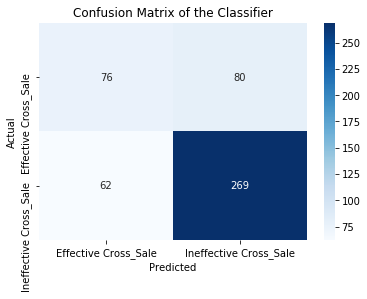

In [33]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = logreg_pred,
          labels = ['Effective Cross_Sale', 'Ineffective Cross_Sale'])

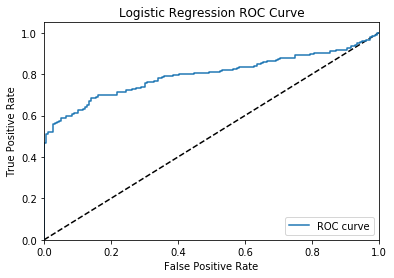

In [34]:
from sklearn.metrics import roc_curve

roc_auc_score(y_test,logreg_pred)

y_pred_prob = logreg.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot(fpr, tpr, label = 'ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [35]:
# creating an empty list
model_performance = [['Model', 'Training Accuracy',
                      'Testing Accuracy', 'AUC Value']]


# train accuracy
logreg_train_acc  = logreg_fit.score(X_train, y_train).round(4)


# test accuracy
logreg_test_acc   = logreg_fit.score(X_test, y_test).round(4)


# auc value
logreg_auc = roc_auc_score(y_true  = y_test,
                           y_score = logreg_pred).round(4)


# saving the results
model_performance.append(['Logistic Regression',
                          logreg_train_acc,
                          logreg_test_acc,
                          logreg_auc])


# checking the results
for model in model_performance:
    print(model)

['Model', 'Training Accuracy', 'Testing Accuracy', 'AUC Value']
['Logistic Regression', 0.6895, 0.7084, 0.6499]


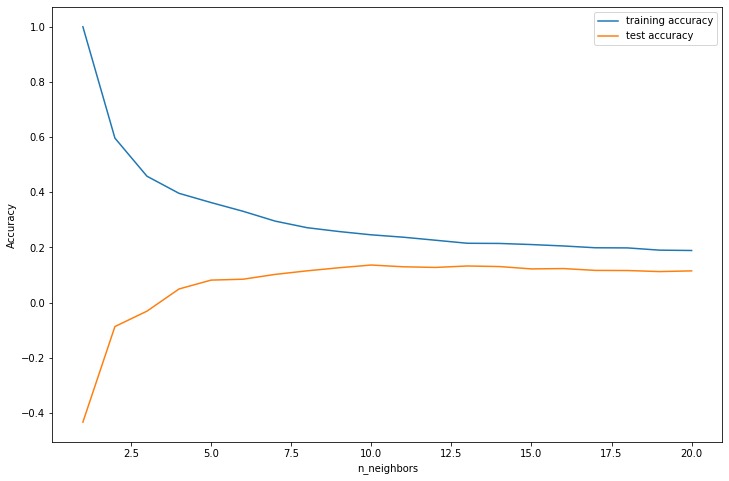

In [36]:
##################################
# K Nearest Neighbors (KNN) Model
##################################

# train/test split with the full model
X   =  num_df.loc[ : , candidate_dict['logit_sig_2']]
y   =  num_df.loc[ : , 'CROSS_SELL_SUCCESS']


# This is the exact code we were using before
X_train, X_test, y_train, y_test = train_test_split(
            X,
            y,
            test_size    = 0.25,
            random_state = 802,
            stratify     = y)

# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 21)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [37]:
# determining the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

The optimal number of neighbors is 10


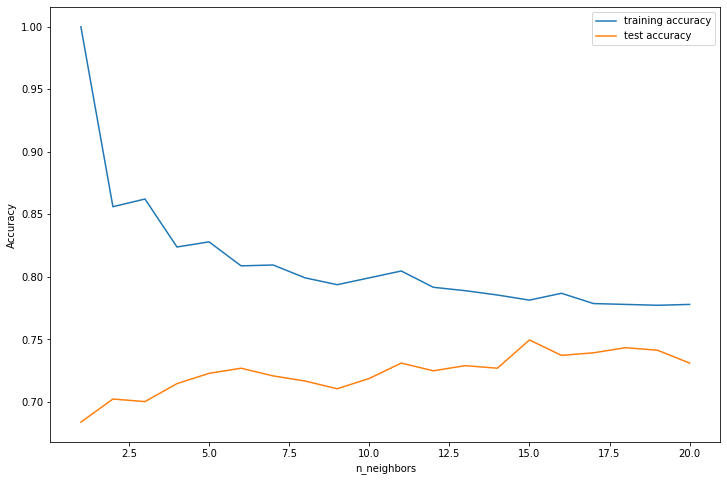

The optimal number of neighbors is: 15


In [38]:
opt_neighbors = optimal_neighbors(X_data = X,
                                 y_data = y,
                                 response_type = 'class')

In [39]:
# Run KNN again with opt_neighbors = 15

# INSTANTIATING a KNN model object
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 15)


# FITTING to the training data
knn_reg.fit(X_train, y_train)


# PREDICTING on new data
knn_reg_pred = knn_reg.predict(X_test)


# SCORING the results
print('Training Score:', knn_reg.score(X_train, y_train).round(4))
print('Testing Score :',  knn_reg.score(X_test, y_test).round(4))
print('AUC Score     :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_reg_pred).round(4))


# train accuracy
knn_train_acc  = knn_reg.score(X_train, y_train).round(4)


# test accuracy
knn_test_acc   = knn_reg.score(X_test, y_test).round(4)


# auc value
knn_auc = roc_auc_score(y_true  = y_test,
                           y_score = knn_reg_pred).round(4)


# saving the results
model_performance.append(['KNN - with opt_neighbors',
                          knn_train_acc,
                          knn_test_acc,
                          knn_auc])


# checking the results
for model in model_performance:
    print(model)


Training Score: 0.2103
Testing Score : 0.122
AUC Score     : 0.7239
['Model', 'Training Accuracy', 'Testing Accuracy', 'AUC Value']
['Logistic Regression', 0.6895, 0.7084, 0.6499]
['KNN - with opt_neighbors', 0.2103, 0.122, 0.7239]


In [40]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(X_train, y_train)


# TRANSFORMING the data
X_scaled     = scaler.transform(X)


# converting to a DataFrame
X_scaled_df  = pd.DataFrame(X_scaled) 


# train-test split with the scaled data
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            X_scaled_df,
            y,
            random_state = 802,
            test_size = 0.25,
            stratify = y)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# FITTING the training data
knn_fit = knn_opt.fit(X_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(X_test_scaled)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(X_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(X_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test_scaled,
                                          y_score = knn_pred).round(4))

# train accuracy
knn_train_acc = knn_fit.score(X_train_scaled, y_train_scaled).round(4)


# test accuracy
knn_test_acc  = knn_fit.score(X_test_scaled, y_test_scaled).round(4)


# auc value
knn_auc       = roc_auc_score(y_true  = y_test_scaled,
                              y_score = knn_pred).round(4)


# saving the results
model_performance.append(['KNN - with StandardScaler',
                          knn_train_acc,
                          knn_test_acc,
                          knn_auc])


# checking the results
for model in model_performance:
    print(model)

Training ACCURACY: 0.7971
Testing  ACCURACY: 0.7413
AUC Score        : 0.7232
['Model', 'Training Accuracy', 'Testing Accuracy', 'AUC Value']
['Logistic Regression', 0.6895, 0.7084, 0.6499]
['KNN - with opt_neighbors', 0.2103, 0.122, 0.7239]
['KNN - with StandardScaler', 0.7971, 0.7413, 0.7232]


In [41]:
##################################
# Decision tree Model
##################################
def display_tree(tree, feature_df, height = 500, width = 800, export = False):

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width,
                unconfined = True)


    return img

########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):

    # declaring the number
    n_features = X_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [42]:
# train/test split with the full model
X   =  num_df.loc[ : , candidate_dict['logit_sig_2']]
y   =  num_df.loc[ : , 'CROSS_SELL_SUCCESS']


# This is the exact code we were using before
X_train, X_test, y_train, y_test = train_test_split(
            X,
            y,
            test_size    = 0.25,
            random_state = 802,
            stratify     = y)


# INSTANTIATING a classification tree object
tree_pruned      = DecisionTreeClassifier(max_depth = 4,
                                          min_samples_leaf = 25,
                                          random_state = 802)


# FITTING the training data
tree_pruned_fit  = tree_pruned.fit(X_train, y_train)


# PREDICTING on new data
tree_pred = tree_pruned_fit.predict(X_test)


# SCORING the model
print('Training ACCURACY:', tree_pruned_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', tree_pruned_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_pred).round(4))


# train accuracy
tree_train_acc = tree_pruned_fit.score(X_train, y_train).round(4)

# test accuracy
tree_test_acc  = tree_pruned_fit.score(X_test, y_test).round(4)

# auc value
tree_auc       = roc_auc_score(y_true  = y_test,
                               y_score = tree_pred).round(4)

# saving the results
model_performance.append(['Tree',
                          tree_train_acc,
                          tree_test_acc,
                          tree_auc])


# checking the results
for model in model_performance:
    print(model)
    

Training ACCURACY: 0.7841
Testing  ACCURACY: 0.7782
AUC Score        : 0.7725
['Model', 'Training Accuracy', 'Testing Accuracy', 'AUC Value']
['Logistic Regression', 0.6895, 0.7084, 0.6499]
['KNN - with opt_neighbors', 0.2103, 0.122, 0.7239]
['KNN - with StandardScaler', 0.7971, 0.7413, 0.7232]
['Tree', 0.7841, 0.7782, 0.7725]


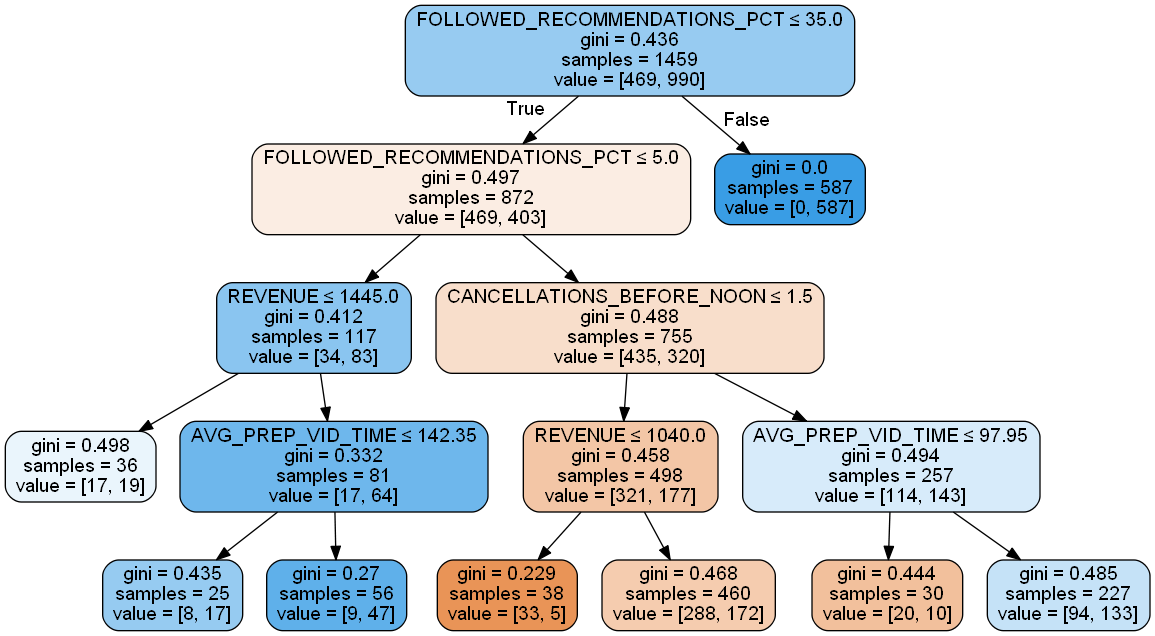

In [43]:
# calling display_tree
display_tree(tree       = tree_pruned_fit,
             feature_df = X_train)

C:\Users\sunlo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:44: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


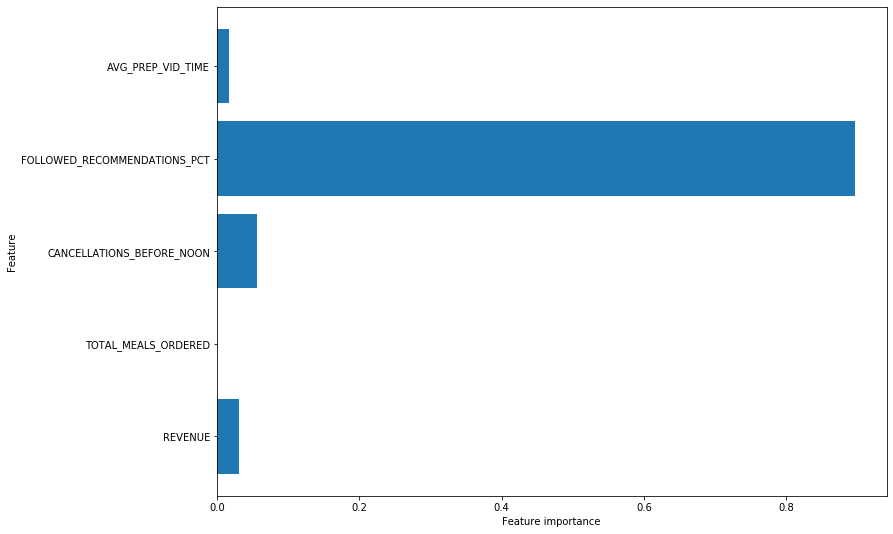

In [44]:
# plotting feature importance
plot_feature_importances(tree_pruned_fit,
                         train = X_train,
                         export = False)

In [45]:
criterion_space = ['gini', 'entropy']
splitter_space = ['best', 'random']
depth_space = pd.np.arange(1, 25)
leaf_space  = pd.np.arange(1, 100)


# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_space,
              'splitter'         : splitter_space,
              'max_depth'        : depth_space,
              'min_samples_leaf' : leaf_space}


# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 802)


# GridSearchCV object
tuned_tree_cv = GridSearchCV(estimator  = tuned_tree,
                             param_grid = param_grid,
                             cv         = 3,
                             scoring    = make_scorer(roc_auc_score,
                                                      needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(X, y)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

C:\Users\sunlo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sunlo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  after removing the cwd from sys.path.


Tuned Parameters  : {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 8, 'splitter': 'best'}
Tuned Training AUC: 0.6635


In [46]:
# INSTANTIATING a classification tree object
tree_pruned      = DecisionTreeClassifier(criterion = 'entropy',
                                          max_depth = 4,
                                          min_samples_leaf = 8,
                                          splitter     = 'best',
                                          random_state = 802)


# FITTING the training data
tree_pruned_fit  = tree_pruned.fit(X_train, y_train)


# PREDICTING on new data
tree_pred = tree_pruned_fit.predict(X_test)


# SCORING the model
print('Training ACCURACY:', tree_pruned_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', tree_pruned_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_pred).round(4))


# train accuracy
tree_train_acc = tree_pruned_fit.score(X_train, y_train).round(4)

# test accuracy
tree_test_acc  = tree_pruned_fit.score(X_test, y_test).round(4)

# auc value
tree_auc       = roc_auc_score(y_true  = y_test,
                               y_score = tree_pred).round(4)

# saving the results
model_performance.append(['Tree - with GridSearchCV',
                          tree_train_acc,
                          tree_test_acc,
                          tree_auc])


# checking the results
for model in model_performance:
    print(model)
    

Training ACCURACY: 0.7855
Testing  ACCURACY: 0.7536
AUC Score        : 0.756
['Model', 'Training Accuracy', 'Testing Accuracy', 'AUC Value']
['Logistic Regression', 0.6895, 0.7084, 0.6499]
['KNN - with opt_neighbors', 0.2103, 0.122, 0.7239]
['KNN - with StandardScaler', 0.7971, 0.7413, 0.7232]
['Tree', 0.7841, 0.7782, 0.7725]
['Tree - with GridSearchCV', 0.7855, 0.7536, 0.756]


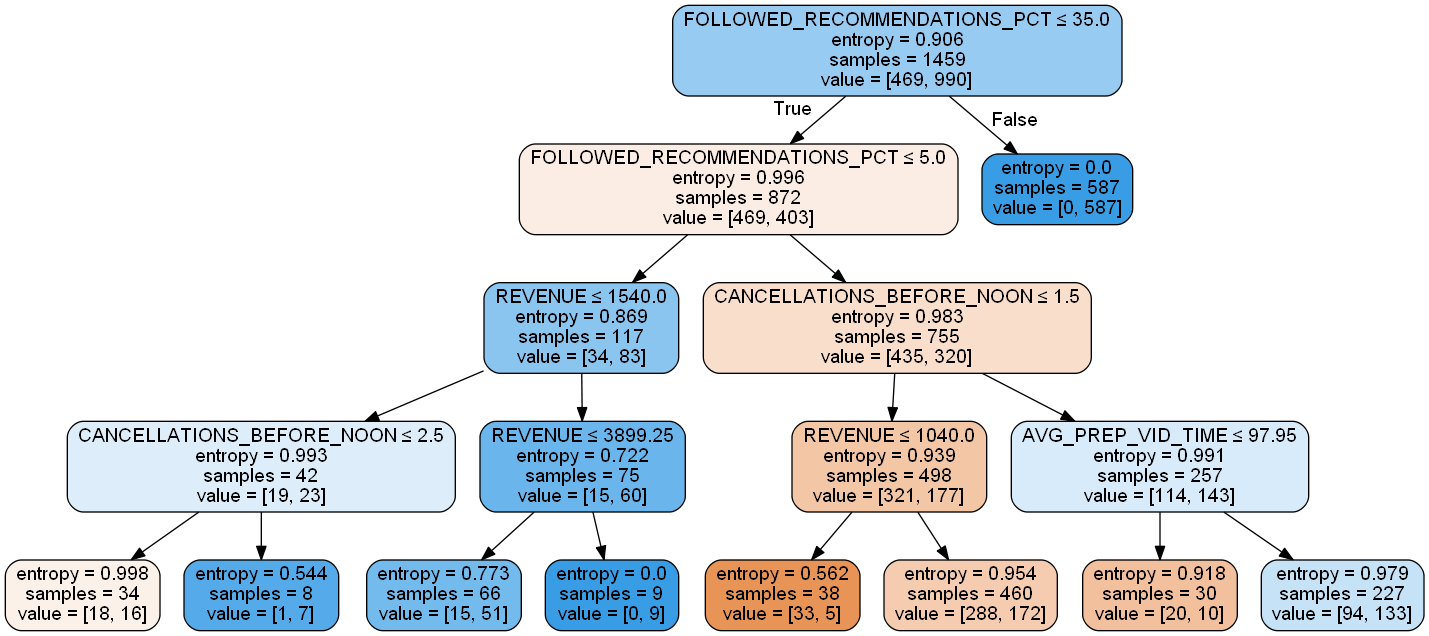

In [47]:
# calling display_tree
display_tree(tree       = tree_pruned_fit,
             feature_df = X_train)

C:\Users\sunlo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:44: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


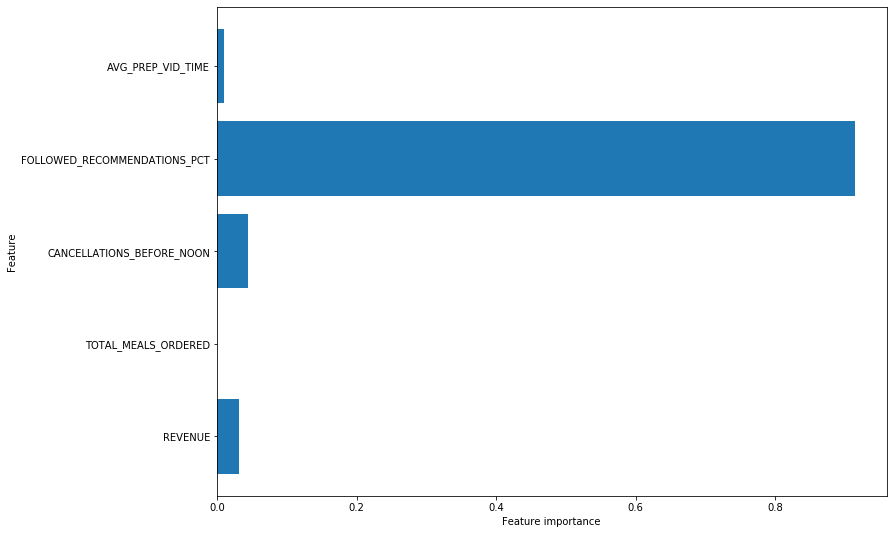

In [48]:
# plotting feature importance
plot_feature_importances(tree_pruned_fit,
                         train = X_train,
                         export = False)

In [49]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
tree_tuned = tuned_tree_cv.best_estimator_


# FIT step is not needed


# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(X_test)


# SCORING the results
print('Training ACCURACY:', tree_tuned.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))

Training ACCURACY: 0.7868
Testing  ACCURACY: 0.7967
AUC Score        : 0.8064


In [50]:
# train accuracy
tree_train_acc = tree_tuned.score(X_train, y_train).round(4)

# test accuracy
tree_test_acc  = tree_tuned.score(X_test, y_test).round(4)

# auc value
tree_auc       = roc_auc_score(y_true  = y_test,
                               y_score = tree_tuned_pred).round(4)

# saving the results
model_performance.append(['Tree - with best_estimater_',
                          tree_train_acc,
                          tree_test_acc,
                          tree_auc])


# checking the results
for model in model_performance:
    print(model)

['Model', 'Training Accuracy', 'Testing Accuracy', 'AUC Value']
['Logistic Regression', 0.6895, 0.7084, 0.6499]
['KNN - with opt_neighbors', 0.2103, 0.122, 0.7239]
['KNN - with StandardScaler', 0.7971, 0.7413, 0.7232]
['Tree', 0.7841, 0.7782, 0.7725]
['Tree - with GridSearchCV', 0.7855, 0.7536, 0.756]
['Tree - with best_estimater_', 0.7868, 0.7967, 0.8064]


In [51]:
##################################
# Random Forest Model
##################################

# train/test split with the full model
X   =  num_df.loc[ : , candidate_dict['logit_sig_2']]
y   =  num_df.loc[ : , 'CROSS_SELL_SUCCESS']


# This is the exact code we were using before
X_train, X_test, y_train, y_test = train_test_split(
            X,
            y,
            test_size    = 0.25,
            random_state = 802,
            stratify     = y)


# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = 15,
                                    min_samples_leaf = 2,
                                    bootstrap        = True,
                                    warm_start       = True,
                                    random_state     = 802)


# FITTING the training data
rf_default_fit = rf_default.fit(X_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

# train accuracy
rf_train_acc = rf_default_fit.score(X_train, y_train).round(4)

# test accuracy
rf_test_acc  = rf_default_fit.score(X_test, y_test).round(4)

# auc value
rf_auc       = roc_auc_score(y_true  = y_test,
                               y_score = rf_default_fit_pred).round(4)

# saving the results
model_performance.append(['Random Forest',
                          rf_train_acc,
                          rf_test_acc,
                          rf_auc])


# checking the results
for model in model_performance:
    print(model)

Training ACCURACY: 0.9836
Testing  ACCURACY: 0.7125
AUC Score        : 0.6852
['Model', 'Training Accuracy', 'Testing Accuracy', 'AUC Value']
['Logistic Regression', 0.6895, 0.7084, 0.6499]
['KNN - with opt_neighbors', 0.2103, 0.122, 0.7239]
['KNN - with StandardScaler', 0.7971, 0.7413, 0.7232]
['Tree', 0.7841, 0.7782, 0.7725]
['Tree - with GridSearchCV', 0.7855, 0.7536, 0.756]
['Tree - with best_estimater_', 0.7868, 0.7967, 0.8064]
['Random Forest', 0.9836, 0.7125, 0.6852]


C:\Users\sunlo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:44: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


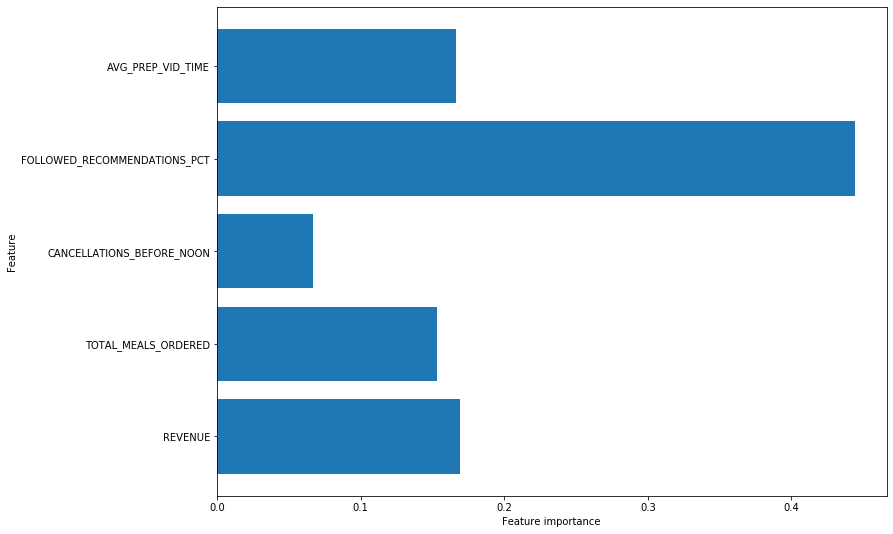

In [52]:
# plotting feature importance
plot_feature_importances(rf_default_fit,
                         train = X_train,
                         export = False)

In [53]:
# declaring a hyperparameter space
estimator_space  = pd.np.arange(100, 1100, 250)
leaf_space       = pd.np.arange(1, 31, 10)
criterion_space  = ['gini', 'entropy']
bootstrap_space  = [True, False]
warm_start_space = [True, False]


# creating a hyperparameter grid
param_grid = {'n_estimators'     : estimator_space,
              'min_samples_leaf' : leaf_space,
              'criterion'        : criterion_space,
              'bootstrap'        : bootstrap_space,
              'warm_start'       : warm_start_space}


# INSTANTIATING the model object without hyperparameters
forest_grid = RandomForestClassifier(random_state = 802)


# GridSearchCV object
forest_cv = GridSearchCV(estimator  = forest_grid,
                         param_grid = param_grid,
                         cv         = 3,
                         scoring    = make_scorer(roc_auc_score,
                                           needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
forest_cv.fit(X, y)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", forest_cv.best_params_)
print("Tuned Training AUC:", forest_cv.best_score_.round(4))

C:\Users\sunlo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
C:\Users\sunlo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until


Tuned Parameters  : {'bootstrap': True, 'criterion': 'gini', 'min_samples_leaf': 11, 'n_estimators': 600, 'warm_start': True}
Tuned Training AUC: 0.6243


In [54]:
# INSTANTIATING the model object without hyperparameters
rf_tuned = RandomForestClassifier(bootstrap        = True,
                                       criterion        = 'gini',
                                       min_samples_leaf = 11,
                                       n_estimators     = 600,
                                       warm_start       = True,
                                       random_state     = 802)


# FIT step is needed as we are not using .best_estimator
rf_tuned_fit = rf_tuned.fit(X_train, y_train)


# PREDICTING based on the testing set
rf_tuned_pred = rf_tuned_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', rf_tuned.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', rf_tuned.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_tuned_pred).round(4))

# train accuracy
rf_train_acc = rf_tuned.score(X_train, y_train).round(4)

# test accuracy
rf_test_acc  = rf_tuned.score(X_test, y_test).round(4)

# auc value
rf_auc       = roc_auc_score(y_true  = y_test,
                               y_score = rf_tuned_pred).round(4)

# saving the results
model_performance.append(['Random Forest - with GridSearchCV',
                          rf_train_acc,
                          rf_test_acc,
                          rf_auc])


# checking the results
for model in model_performance:
    print(model)

Training ACCURACY: 0.8444
Testing  ACCURACY: 0.7556
AUC Score        : 0.7321
['Model', 'Training Accuracy', 'Testing Accuracy', 'AUC Value']
['Logistic Regression', 0.6895, 0.7084, 0.6499]
['KNN - with opt_neighbors', 0.2103, 0.122, 0.7239]
['KNN - with StandardScaler', 0.7971, 0.7413, 0.7232]
['Tree', 0.7841, 0.7782, 0.7725]
['Tree - with GridSearchCV', 0.7855, 0.7536, 0.756]
['Tree - with best_estimater_', 0.7868, 0.7967, 0.8064]
['Random Forest', 0.9836, 0.7125, 0.6852]
['Random Forest - with GridSearchCV', 0.8444, 0.7556, 0.7321]


In [55]:
##################################
# Gradient Booster Model
##################################

# train/test split with the full model
X   =  num_df.loc[ : , candidate_dict['logit_sig_2']]
y   =  num_df.loc[ : , 'CROSS_SELL_SUCCESS']


# This is the exact code we were using before
X_train, X_test, y_train, y_test = train_test_split(
            X,
            y,
            test_size    = 0.25,
            random_state = 802,
            stratify     = y)

# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = "friedman_mse",
                                              max_depth     = 3,
                                              warm_start    = True,
                                              random_state  = 802)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(X_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(X_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))


# declaring model performance objects
gbm_train_acc = full_gbm_default_fit.score(X_train, y_train).round(4)
gbm_test_acc  = full_gbm_default_fit.score(X_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = full_gbm_default_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model'             : 'GBM',
                          'Training Accuracy'  : gbm_train_acc,
                          'Testing Accuracy'   : gbm_test_acc,
                          'AUC Value'          : gbm_auc})


model_performance


Training ACCURACY: 0.8629
Testing ACCURACY : 0.7556
AUC Score        : 0.7389


In [56]:
# declaring a hyperparameter space
learn_space     = pd.np.arange(0.1, 1.6, 0.3)
estimator_space = pd.np.arange(50, 250, 50)
depth_space     = pd.np.arange(1, 10)


# creating a hyperparameter grid
param_grid = {'learning_rate' : learn_space,
              'max_depth'     : depth_space,
              'n_estimators'  : estimator_space}


# INSTANTIATING the model object without hyperparameters
full_gbm_grid = GradientBoostingClassifier(random_state = 802)


# GridSearchCV object
full_gbm_cv = GridSearchCV(estimator  = full_gbm_grid,
                           param_grid = param_grid,
                           cv         = 3,
                           scoring    = make_scorer(roc_auc_score,
                                        needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
full_gbm_cv.fit(X, y)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", full_gbm_cv.best_params_)
print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))

C:\Users\sunlo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
C:\Users\sunlo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sunlo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  after removing the cwd from sys.path.


Tuned Parameters  : {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50}
Tuned Training AUC: 0.6267


In [70]:
# 'GBM - with GridSearchCV'

# INSTANTIATING the model object without hyperparameters
gbm_tuned = GradientBoostingClassifier(learning_rate = 0.1,
                                       max_depth     = 2,
                                       n_estimators  = 50,
                                       random_state  = 802)


# FIT step is needed as we are not using .best_estimator
gbm_tuned_fit = gbm_tuned.fit(X_train, y_train)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(X_test)


# declaring model performance objects
gbm_train_acc = gbm_tuned_fit.score(X_train, y_train).round(4)
gbm_test_acc  = gbm_tuned_fit.score(X_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = gbm_tuned_pred).round(4)


# appending to model_performance
print(f""" 
    'Model'             : 'GBM - with GridSearchCV',
    'Training Accuracy'  : {gbm_train_acc},
    'Testing Accuracy'   : {gbm_test_acc},
     'AUC Value'          : {gbm_auc}
                          """)



 
    'Model'             : 'GBM - with GridSearchCV',
    'Training Accuracy'  : 0.7992,
    'Testing Accuracy'   : 0.7659,
     'AUC Value'          : 0.76
                          


In [139]:
# comparing results

print(f"""
Model                      Train Score      \tTest Score        \t'AUC Score'
-----                      -----------      \t----------        \t----------
Logistic_Regression        {logreg_train_acc}        \t{logreg_test_acc}          \t{logreg_auc}
K_Nearest_Neighbors        {knn_train_acc}           \t{knn_test_acc}           \t{knn_auc}
Decision_Tree              {tree_train_acc}          \t{tree_test_acc}          \t{tree_auc}
Random_Forest              {rf_test_acc}             \t{rf_test_acc}          \t{rf_auc}
Gradient_Boosting          {gbm_train_acc}           \t{gbm_test_acc}           \t{gbm_auc}
 """)


# creating a dictionary for model results
model_performance = {'Model'    : ['Logistic_Regression', 'K_Nearest_Neighbors', 'Decision_Tree','Random_Forest','Gradient_Boosting'],
           
                     'Training' : [logreg_train_acc, knn_train_acc,tree_train_acc,rf_test_acc, gbm_train_acc],
           
                     'Testing'  : [logreg_test_acc, knn_test_acc,tree_test_acc, rf_test_acc, gbm_test_acc],
                     
                     'AUC Score': [logreg_auc, knn_auc, tree_auc, rf_auc, gbm_auc]
                    }


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
#model_performance.to_excel('Assigment_2_regression_model_performance_final.xlsx',index = False)


Model                      Train Score      	Test Score        	'AUC Score'
-----                      -----------      	----------        	----------
Logistic_Regression        0.6895        	0.7084          	0.6499
K_Nearest_Neighbors        0.7971           	0.7413           	0.7232
Decision_Tree              0.7868          	0.7967          	0.8064
Random_Forest              0.7556             	0.7556          	0.7321
Gradient_Boosting          0.7992           	0.7659           	0.76
 
